In [1]:
import pandas
import numpy

df = pandas.read_csv("/home/kub/Documents/dialogy/dialogy1.txt", delimiter = "\t")
df.columns = ["column"]
dff = df[df.index.str.contains("dialog ") == True]
print("Pocet dialogu v dialogy1.txt je " + str(len(dff)) + ".")

df2 = pandas.read_csv("/home/kub/Documents/dialogy/dialogy2.txt", delimiter = "\t")
df2.columns = ["column"]
dff2 = df2[df2.index.str.contains("dialog ") == True]
print("Pocet dialogu v dialogy2.txt je " + str(len(dff2)) + ".")

modifikatory = pandas.read_csv("/home/kub/Documents/dialogy/modifikatory.txt", delimiter = "\t",  encoding ='ISO-8859-1', header = None)
modifikatory.columns = ["column"]
modifikatory["column"] = modifikatory.column.str.replace("è", "č")
modifikatory["column"] = modifikatory.column.str.replace("ø", "ř")
modifikatory["column"] = modifikatory.column.str.replace("", "š")
modifikatory["column"] = modifikatory.column.str.replace("", "ž") 
modifikatory["column"] = modifikatory.column.str.replace("ì", "ě")

mod_list = modifikatory["column"].tolist()
mod_pat = "|".join(mod_list)

testdf = df
testdf["Novy_sloupec"] = numpy.select([testdf["column"].isnull()], "1", "0") #1 = dialog, 0 = není dialog
testdf2 = testdf.loc[testdf["Novy_sloupec"].shift() != testdf["Novy_sloupec"]] #zcheckne jestli se ten řádek rovná tomu druhému
testdf2.columns = ["column", "Je_nan"]
testdf = testdf2[testdf2.Je_nan == "0"]
testdf["ma_mod"] = testdf.column.str.contains(mod_pat) #tohle mi dá true kde je modifikator
print("Počet dialogů v dialogy1.txt obsahujících modifikátor je " + str(testdf["ma_mod"].value_counts()[True]) + ".")

testdf2 = df2
testdf2["Novy_sloupec"] = numpy.select([testdf2["column"].isnull()], "1", "0") #1 = dialog, 0 = není dialog
testdf3 = testdf2.loc[testdf2["Novy_sloupec"].shift() != testdf2["Novy_sloupec"]] #zcheckne jestli se ten řádek rovná tomu druhému
testdf3.columns = ["column", "Je_nan"]
testdf2 = testdf3[testdf3.Je_nan == "0"]
testdf2["ma_mod"] = testdf2.column.str.contains(mod_pat) #tohle mi dá true kde je modifikator
print("Počet dialogů v dialogy2.txt obsahujících modifikátor je " + str(testdf2["ma_mod"].value_counts()[True]) + ".")


Pocet dialogu v dialogy1.txt je 40676.
Pocet dialogu v dialogy2.txt je 50699.


/tmp/ipykernel_16301/2977996038.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["ma_mod"] = testdf.column.str.contains(mod_pat) #tohle mi dá true kde je modifikator


Počet dialogů v dialogy1.txt obsahujících modifikátor je 17213.
Počet dialogů v dialogy2.txt obsahujících modifikátor je 21821.


/tmp/ipykernel_16301/2977996038.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf2["ma_mod"] = testdf2.column.str.contains(mod_pat) #tohle mi dá true kde je modifikator


'\ndialogy = df[df.index.str.contains("dialog ")]\n#dialogy \n\ntestdf = df.tail(100)\ntestdf\n'

'\nfor a,b in df.iterrows():\n    if b.notna() == True:\n        \n        if any(x in modifikatory["column"] for x in b):\n            print(b)\n        \n        \n        a_string = "A string is more than its parts!"\n        matches = ["more", "wholesome", "milk"]\n\n        if any(x in a_string for x in matches):\n'

In [ ]:
#df = pandas.read_csv("/home/kub/Documents/dialogy/dialogy1.txt", usecols = ["mm","gg"], header = 0,delimiter = "\t")
dff = df[df.index.str.contains("dialog ") == True]
len(dff)

40676

true


In [5]:
testdf = df
testdf["Novy_sloupec"] = numpy.select([testdf["column"].isnull()], "1", "0") #1 = dialog, 0 = není dialog
testdf

,column,Novy_sloupec
07:19,boty do vody,0
07:19,boty do vody k moři,0
07:19,boty do vody pro děti,0
07:20,boty na beh,0
07:20,boty na běh,0
...,...,...
13:28,prodej traktoru zetor havlickuv brod inzerce ...,0
13:31,wwwprodej traktoru zetoru havl brod 29. 6.2016,0
13:31,prodej traktoru zetoru havl brod 29. 6.2016 in...,0
13:32,prodeje zetoru havlickuv brod a nabidka,0


In [33]:
testdf2["column"].isna().sum()

40676

In [6]:
testdf2 = testdf.loc[testdf["Novy_sloupec"].shift() != testdf["Novy_sloupec"]] #zcheckne jestli se ten řádek rovná tomu druhému
testdf2.columns = ["column", "Je_nan"]



In [7]:
testdf = testdf2[testdf2.Je_nan == "0"]
testdf.describe()

,column,Je_nan
count,40677,40677
unique,30359,1
top,facebook,0
freq,1552,40677


In [132]:
timedf = df
timedf["Aktivita"] = 1
timedf = timedf.reset_index()
print(len(timedf))
timedf = timedf[timedf["column"].notna()]
print(len(timedf))
timedf = timedf.drop(columns = ["column", "Novy_sloupec"])
timedf['Time'] = pandas.to_datetime(timedf['Time'])
#timedf["Time"] = pandas.to_datetime(timedf, format='%Y:%H:%M') #- pandas.to_datetime(timedf, format='%H:%M').dt.normalize()
type(timedf.iloc[0,0])
#timedf[:,0]
#timedf.index.name = "Time"


941376
900700


pandas._libs.tslibs.timestamps.Timestamp

In [2]:
timedf = df
timedf["Aktivita"] = 1
timedf = timedf.reset_index()
timedf = timedf[timedf["column"].notna()]
timedf = timedf.drop(columns = ["column", "Novy_sloupec"])
timedf.columns = ["Time", "Aktivita"]
timedf['Time'] = pandas.to_datetime(timedf['Time'])
timedf = timedf.groupby(pandas.Grouper(key='Time', freq="T")).Aktivita.sum() #ABSOLUTNE SUPER
novydf = timedf
novydf = pandas.DataFrame([timedf])

novydf

Time,2021-10-05 00:00:00,2021-10-05 00:01:00,2021-10-05 00:02:00,2021-10-05 00:03:00,2021-10-05 00:04:00,2021-10-05 00:05:00,2021-10-05 00:06:00,2021-10-05 00:07:00,2021-10-05 00:08:00,2021-10-05 00:09:00,...,2021-10-05 23:50:00,2021-10-05 23:51:00,2021-10-05 23:52:00,2021-10-05 23:53:00,2021-10-05 23:54:00,2021-10-05 23:55:00,2021-10-05 23:56:00,2021-10-05 23:57:00,2021-10-05 23:58:00,2021-10-05 23:59:00
Aktivita,313,339,330,279,291,275,293,278,283,242,...,329,336,376,354,326,330,301,312,325,332


In [3]:
novydf.columns
grafdf = pandas.DataFrame(columns = ["cas", "aktivita"])
grafdf["cas"] = novydf.columns
grafdf["aktivita"] = novydf.iloc[0]

for a in range(1440):
    grafdf["aktivita"][a] = novydf.iloc[0,a] #prasacky způsob upravení tabulky do kýžené podoby


#grafdf["cas_h"] = grafdf["cas"].str[-8:] #odpusťte mi mé hříchy
grafdf

/tmp/ipykernel_16301/1896318403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafdf["aktivita"][a] = novydf.iloc[0,a] #prasacky způsob upravení tabulky do kýžené podoby


,cas,aktivita
0,2021-10-05 00:00:00,313.0
1,2021-10-05 00:01:00,339.0
2,2021-10-05 00:02:00,330.0
3,2021-10-05 00:03:00,279.0
4,2021-10-05 00:04:00,291.0
...,...,...
1435,2021-10-05 23:55:00,330.0
1436,2021-10-05 23:56:00,301.0
1437,2021-10-05 23:57:00,312.0
1438,2021-10-05 23:58:00,325.0


In [57]:
p = str(grafdf.iloc[418,0])
p[-8:]
str(grafdf["cas"])

In [4]:
%history -g -f /home/kub/Documents/history

/tmp/ipykernel_16301/1072533639.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(["00:00", '03:00','06:00','09:00','12:00',


<AxesSubplot:title={'center':'Počet dotazů v čase - dialogy.txt'}, xlabel='Čas', ylabel='Počet dotazů'>

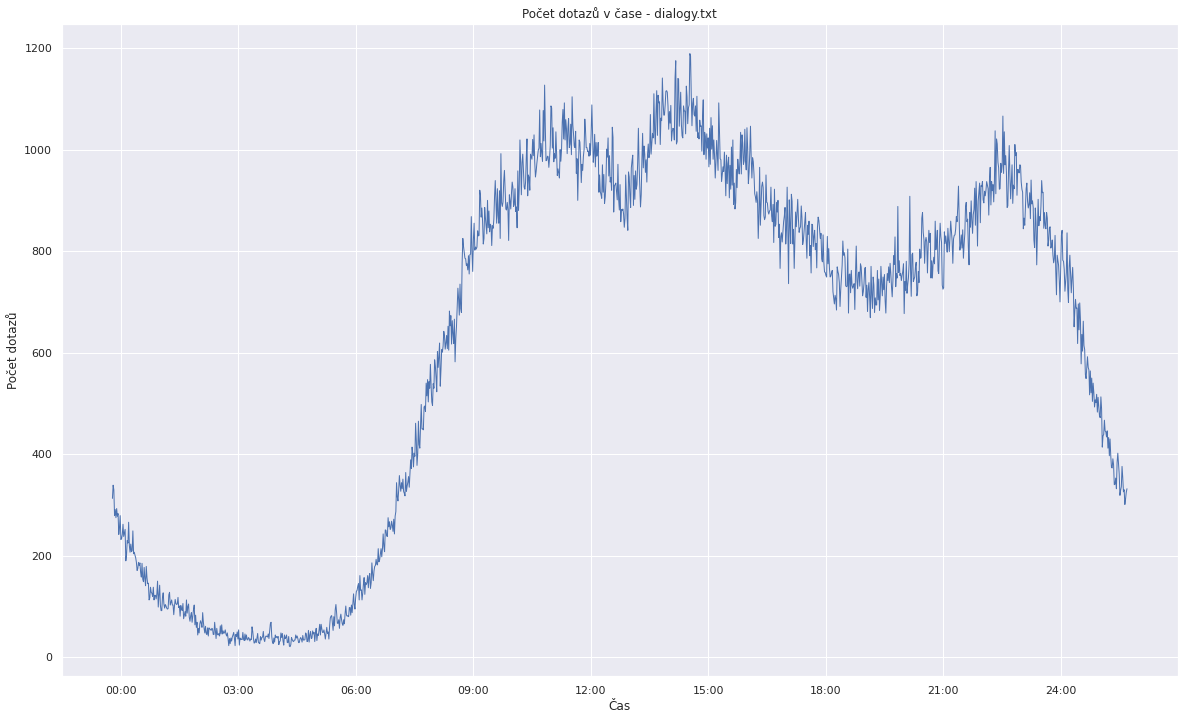

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


fig, ax = plt.subplots()
ax.set_ylabel('Počet dotazů')
ax.set_xlabel('Čas')
ax.set_title('Počet dotazů v čase - dialogy.txt')
sns.set(rc={'figure.figsize':(20, 12)})
g = grafdf["aktivita"].plot(linewidth=1);

#g.xaxis.set_major_locator(mdates.HourLocator(interval = 1))
#g.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#plt.xticks(rotation = 90)
g.set_xticks(range(0,9))
g.xaxis.set_major_locator(mdates.HourLocator(interval = 4000))
g.set_xticklabels(["00:00", '03:00','06:00','09:00','12:00',
                        '15:00','18:00','21:00', '24:00'])
g

In [44]:
len(df)/24

39224.0